# Estimation on real data using MSM

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import figs
import SimulatedMinimumDistance as SMD

# Global modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data

In [2]:
data = pd.read_excel('SASdata/moments.xlsx')
mom_data = data['mom'].to_numpy()
se = data['se'].to_numpy()
obs = data['obs'].to_numpy()
se = se/np.sqrt(obs)
se[se>0] = 1/se[se>0]
factor = np.ones(len(se))
factor[-15:] = 4
W = np.eye(len(se))*se*factor
#cov = pd.read_excel('SASdata/Cov.xlsx')
#weight = 1/np.sqrt(np.diag(cov))
#se = data['se'].to_numpy()
#se[se>0] = 1/se[se>0]
#W = np.
#W = np.eye(len(weight))*weight
#Omega = cov*Nobs

In [3]:
np.diag(W)

array([2182.27410277, 1619.33790676,  430.512233  ,  530.39235351,
        402.82913559,  400.07073343,  523.87751319,  368.27647537,
        358.09677151,  393.08811765,  232.56013511, 2719.77948919,
       1695.44595673,  371.69425252,  461.61398758,  431.32436867,
        432.66359776,  606.4822013 ,  417.51965846,  464.94352334,
        533.64643893,  305.93328412, 1126.71781912,  900.71413157,
        234.8541726 ,  290.73088932,  211.54842271,  208.72345209,
        265.11179335,  213.58063054,  190.9236432 ,  206.20557616,
        122.67150813, 1124.64880014,  898.3245967 ,  230.39778725,
        274.936096  ,  191.00539334,  179.53768049,  213.17736957,
        160.28072503,  129.95328168,  126.78860894,   67.43371025,
        306.38582481,  306.46445585,  307.25411048,  309.22832582,
        312.42888118,  317.87423991,  328.63808026,  351.67505691,
        339.14467139,  329.67766556,  321.35390443,  313.46189134,
        307.89024804,  307.22769025,  306.30725427])

### Set up estimation

In [4]:
single_kwargs = {'simN': int(1e5), 'simT': 68-53+1}
Couple = RetirementClass(couple=True, single_kwargs=single_kwargs, 
                         simN=int(1e5), simT=68-53+1)
Couple.solve()
Couple.simulate()

In [5]:
def mom_fun(Couple):
    return SMD.MomFun(Couple)

In [6]:
est_par = ["alpha_0_male", "alpha_0_female", "sigma_eta", "pareto_w", "phi_0_male"]
smd = SMD.SimulatedMinimumDistance(Couple,mom_data,mom_fun,est_par=est_par)

### Estimate

In [7]:
theta0 = SMD.start(9,bounds=[(0,1), (0,1), (0.2,0.8), (0.2,0.8), (0,2)])

In [8]:
theta0

[[0.551, 0.576, 0.596, 0.5, 1.241],
 [0.591, 0.588, 0.42, 0.498, 0.559],
 [0.23, 0.502, 0.564, 0.547, 1.392],
 [0.369, 0.367, 0.658, 0.431, 0.62]]

In [9]:
smd.MultiStart(theta0,W)
theta = smd.est

Iteration: 50 (11.08 minutes)
 alpha_0_male=0.5044 alpha_0_female=0.4625 sigma_eta=0.8192 pareto_w=0.7542 phi_0_male=0.1227 -> 21.6723
Iteration: 100 (11.19 minutes)
 alpha_0_male=0.5703 alpha_0_female=0.5002 sigma_eta=0.7629 pareto_w=0.7459 phi_0_male=0.1575 -> 17.7938
Iteration: 150 (10.73 minutes)
 alpha_0_male=0.5546 alpha_0_female=0.5131 sigma_eta=0.6877 pareto_w=0.8166 phi_0_male=0.1905 -> 16.9717
Iteration: 200 (10.94 minutes)
 alpha_0_male=0.5526 alpha_0_female=0.5128 sigma_eta=0.6891 pareto_w=0.8133 phi_0_male=0.1875 -> 16.9319
1 estimation:
success: True | feval: 248 | time: 54.8 min | obj: 16.927585558076142
start par: [0.551, 0.576, 0.596, 0.5, 1.241]
par:       [0.55258074 0.51274232 0.68921531 0.81324937 0.18777072]

Iteration: 250 (11.3 minutes)
 alpha_0_male=0.6206 alpha_0_female=0.5880 sigma_eta=0.4200 pareto_w=0.4980 phi_0_male=0.5590 -> 57.7093
Iteration: 300 (11.24 minutes)
 alpha_0_male=0.5428 alpha_0_female=0.4145 sigma_eta=0.6379 pareto_w=0.5308 phi_0_male=0.3868

### Save parameters

In [10]:
est_par.append('phi_0_female')
thetaN = list(theta)
thetaN.append(Couple.par.phi_0_male)
SMD.save_est(est_par,thetaN,name='baseline')

### Model fit

In [9]:
smd.obj_fun(theta,W)

16.92237774565719

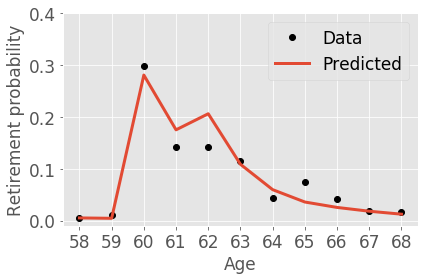

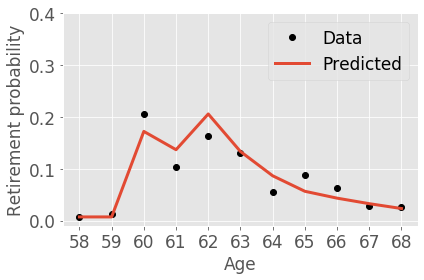

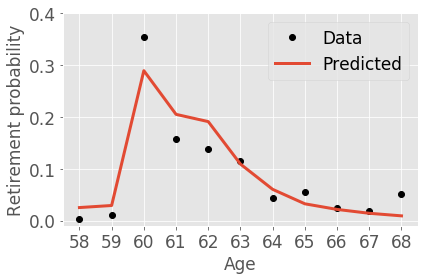

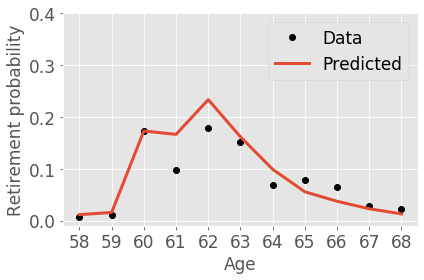

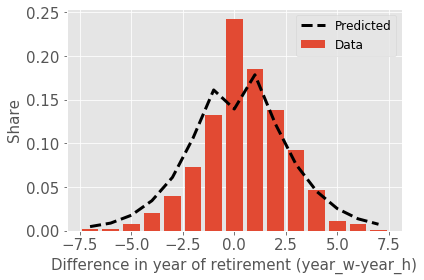

In [10]:
figs.MyPlot(figs.model_fit_marg(smd,0,0),ylim=[-0.01,0.4],linewidth=3).savefig('figs/ModelFit/MargWomenSingle.png')
figs.MyPlot(figs.model_fit_marg(smd,1,0),ylim=[-0.01,0.4],linewidth=3).savefig('figs/ModelFit/MargMenSingle.png')
figs.MyPlot(figs.model_fit_marg(smd,0,1),ylim=[-0.01,0.4],linewidth=3).savefig('figs/ModelFit/MargWomenCouple.png')
figs.MyPlot(figs.model_fit_marg(smd,1,1),ylim=[-0.01,0.4],linewidth=3).savefig('figs/ModelFit/MargMenCoupleW.png')
figs.model_fit_joint(smd).savefig('figs/ModelFit/Joint')

### Sensitivity

In [18]:
est_par_tex = [r'$\alpha^m$', r'$\alpha^f$', r'$\sigma$', r'$\lambda$', r'$\phi$']
fixed_par = ['R', 'rho', 'beta', 'gamma', 'v',
             'priv_pension_male', 'priv_pension_female', 'g_adjust', 'pi_adjust_m', 'pi_adjust_f']
fixed_par_tex = [r'$R$', r'$\rho$', r'$\beta$', r'$\gamma$', r'$v$',
                 r'$PPW^m$', r'$PPW^f$', r'$g$', r'$\pi^m$', r'$\pi^f$']

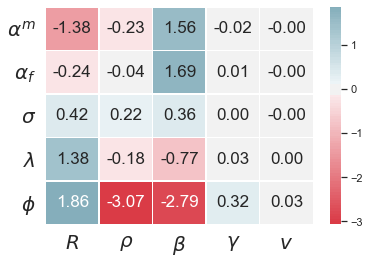

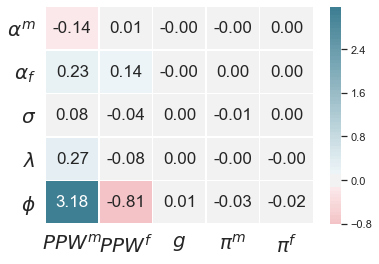

In [19]:
smd.recompute=True
smd.sensitivity(theta,W,fixed_par)
figs.sens_fig_tab(smd.sens2[:,:5],smd.sens2e[:,:5],theta,
                  est_par_tex,fixed_par_tex[:5]).savefig('figs/ModelFit/CouplePref.png')
figs.sens_fig_tab(smd.sens2[:,5:],smd.sens2e[:,5:],theta,
                  est_par_tex,fixed_par_tex[5:]).savefig('figs/modelFit/CoupleCali.png')

### Recalibrate model (phi=0)

In [6]:
Couple.par.phi_0_male = 0
Couple.par.phi_0_female = 0

In [7]:
est_par = ["alpha_0_male", "alpha_0_female", "sigma_eta", "pareto_w"]
smd = SMD.SimulatedMinimumDistance(Couple,mom_data,mom_fun,est_par=est_par)

In [8]:
theta0 = SMD.start(4,bounds=[(0,1), (0,1), (0.2,0.8), (0.2,0.8)])

In [9]:
smd.MultiStart(theta0,W)
theta = smd.est

1 estimation:
success: True | feval: 220 | time: 48.2 min | obj: 18.075899540131683
start par: [0.878, 0.939, 0.494, 0.501]
par:       [0.57538856 0.53292983 0.66919452 0.78768373]

2 estimation:
success: True | feval: 268 | time: 59.8 min | obj: 18.06436034188825
start par: [0.741, 0.977, 0.782, 0.23]
par:       [0.57877531 0.52225649 0.67987012 0.77814082]

3 estimation:
success: True | feval: 263 | time: 59.3 min | obj: 18.025100144784872
start par: [0.489, 0.059, 0.245, 0.653]
par:       [0.57954467 0.52886497 0.68641805 0.78896568]

4 estimation:
success: True | feval: 193 | time: 44.8 min | obj: 18.05028603223897
start par: [0.409, 0.736, 0.735, 0.453]
par:       [0.58045624 0.52222793 0.67634017 0.78087117]

final estimation:
success: True | feval: 146 | obj: 18.02470109022947
total estimation time: 4.1 hours
start par: [0.57954467 0.52886497 0.68641805 0.78896568]
par: [0.57954205 0.52886806 0.68643258 0.7889642 ]



In [10]:
est_par.append("phi_0_male")
est_par.append("phi_0_female")
theta = list(theta)
theta.append(Couple.par.phi_0_male)
theta.append(Couple.par.phi_0_male)
SMD.save_est(est_par,theta,name='phi0')

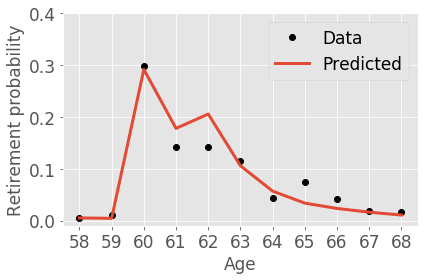

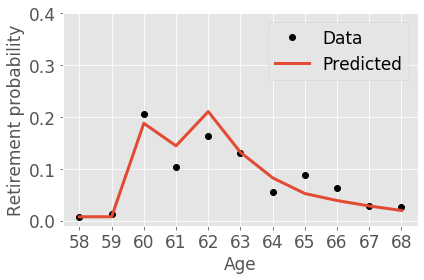

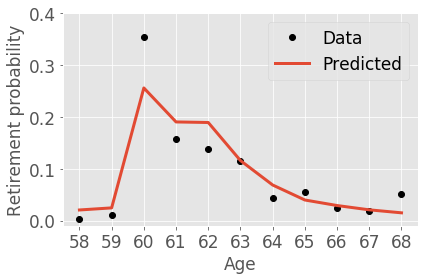

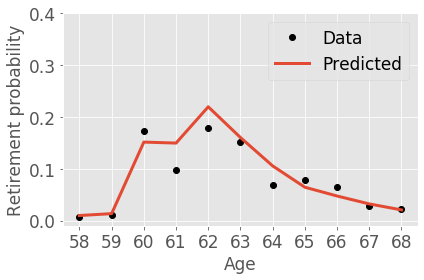

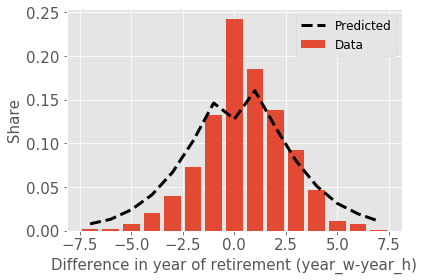

In [11]:
smd.obj_fun(theta,W)
figs.MyPlot(figs.model_fit_marg(smd,0,0),ylim=[-0.01,0.4],linewidth=3).savefig('figs/ModelFit/MargWomenSingle_phi0.png')
figs.MyPlot(figs.model_fit_marg(smd,1,0),ylim=[-0.01,0.4],linewidth=3).savefig('figs/ModelFit/MargMenSingle_phi0.png')
figs.MyPlot(figs.model_fit_marg(smd,0,1),ylim=[-0.01,0.4],linewidth=3).savefig('figs/ModelFit/MargWomenCouple_phi0.png')
figs.MyPlot(figs.model_fit_marg(smd,1,1),ylim=[-0.01,0.4],linewidth=3).savefig('figs/ModelFit/MargMenCoupleW_phi0.png')
figs.model_fit_joint(smd).savefig('figs/ModelFit/Joint_phi0')

### Recalibrate model (phi high)

In [ ]:
Couple.par.phi_0_male = 1.187
Couple.par.phi_0_female = 1.671

In [ ]:
est_par = ["alpha_0_male", "alpha_0_female", "sigma_eta", "pareto_w"]
smd = SMD.SimulatedMinimumDistance(Couple,mom_data,mom_fun,est_par=est_par)

In [ ]:
smd.MultiStart(theta0,W)
theta = smd.est

In [ ]:
est_par.append("phi_0_male")
est_par.append("phi_0_female")
theta = list(theta)
theta.append(Couple.par.phi_0_male)
theta.append(Couple.par.phi_0_male)
SMD.save_est(est_par,theta,name='phi_high')

In [ ]:
smd.obj_fun(theta,W)
figs.MyPlot(figs.model_fit_marg(smd,0,0),ylim=[-0.01,0.4],linewidth=3).savefig('figs/ModelFit/MargWomenSingle_phi_high.png')
figs.MyPlot(figs.model_fit_marg(smd,1,0),ylim=[-0.01,0.4],linewidth=3).savefig('figs/ModelFit/MargMenSingle_phi_high.png')
figs.MyPlot(figs.model_fit_marg(smd,0,1),ylim=[-0.01,0.4],linewidth=3).savefig('figs/ModelFit/MargWomenCouple_phi_high.png')
figs.MyPlot(figs.model_fit_marg(smd,1,1),ylim=[-0.01,0.4],linewidth=3).savefig('figs/ModelFit/MargMenCoupleW_phi_high.png')
figs.model_fit_joint(smd).savefig('figs/ModelFit/Joint_phi_high')